<div style="padding:30px; color: white; background-color: #0071CD">
<center>
<img src="img/logoub.jpeg"></img>
<center>
<h1>Algorísmica Avançada</h1>
<h2>Problemes 5 - Minimum Spanning Tree</h2>
</center>
</div>

In [328]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [329]:
import networkx as nx
from matplotlib import pyplot as plt
import math

<div class="alert alert-success">
    <h1>Problema 1: Union Find</h1>
    <p>
       Implementarem l'algorisme Union-Find. <br>
        Implementeu les tres funcions següents seguint les indicacions de la capçalera.
    </p>    
    
</div>

In [330]:
from collections import defaultdict

def union(parent, rank, node1, node2):
    """
    Operació d'unió de dos nodes. Al finalitzar aquesta funció, s'haurà assignat un dels
    dos nodes d'entrada com a node pare de l'altre. Decidim quin en funció del seu rang.
    
    Params
    ======
    :parent: Diccionari on emmagatzem quin node és pare de quin altre. Aquest diccionari
             ens permet saber l'estructura del graf que estem construint.

    :rank: Diccionari per saber el rang de cada node.
    :node1, node2: Els dos nodes que volem connectar
    """
    root1, root2 = find(parent, node1), find(parent, node2)

    if root1 == root2: return

    rank1, rank2 = rank[root1], rank[root2]

    if rank1 == rank2:
        parent[node2] = node1
        rank[node1] += 1

    elif rank1 < rank2:
        parent[node1] = node2

    else:
        parent[node2] = node1
    
    
    
    
def find(parent, node):
    """
    Donat un node i el diccionari d'estructura del graf amb tots els nodes pare, retorna 
    l'arrel del grup on 'node' pertany.
    
    Params
    ======
    :parent: Diccionari on cada node té associat un node pare.
    :node: Node del que volem comprovar quin és el node arrel del grup al que pertany.
    
    Returns
    =======
    :root: Node arrel del grup on 'node' pertany.
    
    """
    
    root = node
    while parent[root] != root:
        root = parent[root]

    return root


def union_find(lst):
    """
    Implementació de l'algorisme union-find.
    
    Params
    ======
    :lst: Llista de parelles amb les connexions que volem realitzar.    
    
    Returns
    =======
    :parent: Diccionari parent final. Cada node té associat el seu node pare.
    :parent_states: Versions de la variable parent.
    """
    
    # Agafem tots els nodes únics
    list1, list2 = zip(*lst)
    unique_nodes = set(list1+list2)
    
    # Inicialitzem les dues variables rank i parent que ens serviran per anar construïnt el graf
    rank = defaultdict(int)
    parent = {n: n for n in unique_nodes}
    
    # Aquesta variable no forma part de l'algorisme. Guardarem totes les modificacions del diccionari 'parent' que anem fent i, d'aquesta
    # forma, podrem veure com anem connectant tots els nodes.
    parent_states = []
    
    parent_states.append(parent.copy())
    # El teu codi aquí
    for pair in lst:
        root1, root2 = find(parent, pair[0]), find(parent, pair[1])
        if root1 != root2: union(parent, rank, root1, root2)
        parent_states.append(parent.copy())
 
        
    return parent, parent_states

Observeu que usant aquest algorisme, els grafs que creem són sempre arbres, és a dir, que no tenen cicles.

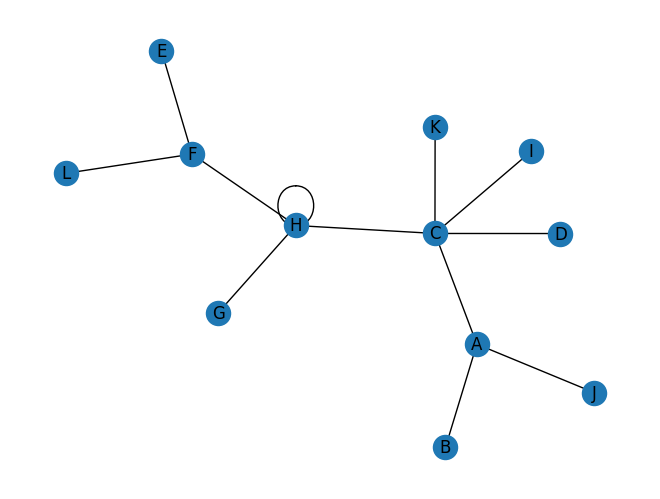

In [331]:
lst = [("C","K"),("F","E"),("A","J"),("A","B"),("C","D"),("D","I"),("L","F"),("C","A"),("A","B"),("H","G"),("H","F"),("H","B")]
struc, struc_states = union_find(lst)

G = nx.Graph(struc)
pos = nx.kamada_kawai_layout(G)
nx.draw(G, pos=pos, with_labels=True)

Podem veure la construcció d'aquest arbre utilitzant la variable on hem anat guardant totes les versions descomentant el següent bloc de codi.

In [332]:
""" fig, axs = plt.subplots(math.ceil(len(struc_states)/6), 6, figsize=(25, math.ceil(len(struc_states)/6)*4.5))
axs = axs.flatten()

for i, state in enumerate(struc_states):
    # Create graph from parent dictionary
    G_state = nx.DiGraph()  # Use DiGraph for directed edges (parent->child)
    
    # Add edges based on parent relationships (skip self-loops for roots)
    for node, parent_node in state.items():
        if node != parent_node:  # Only add edge if not root
            G_state.add_edge(parent_node, node)
    
    # Draw the graph
    nx.draw_networkx(G_state, pos=pos, ax=axs[i], with_labels=True, 
                     arrows=True, node_color='lightblue')
    
    # Set title - handle the case where we've run out of pairs in lst
    if i < len(lst):
        n1, n2 = lst[i]
        axs[i].set_title(f'State {i}: Union ({n1}, {n2})')
    else:
        axs[i].set_title(f'State {i}: Final State')

# Turn off unused subplots
for i in range(len(struc_states), len(axs)): 
    axs[i].axis('off')

plt.tight_layout()
plt.show() """

" fig, axs = plt.subplots(math.ceil(len(struc_states)/6), 6, figsize=(25, math.ceil(len(struc_states)/6)*4.5))\naxs = axs.flatten()\n\nfor i, state in enumerate(struc_states):\n    # Create graph from parent dictionary\n    G_state = nx.DiGraph()  # Use DiGraph for directed edges (parent->child)\n\n    # Add edges based on parent relationships (skip self-loops for roots)\n    for node, parent_node in state.items():\n        if node != parent_node:  # Only add edge if not root\n            G_state.add_edge(parent_node, node)\n\n    # Draw the graph\n    nx.draw_networkx(G_state, pos=pos, ax=axs[i], with_labels=True, \n                     arrows=True, node_color='lightblue')\n\n    # Set title - handle the case where we've run out of pairs in lst\n    if i < len(lst):\n        n1, n2 = lst[i]\n        axs[i].set_title(f'State {i}: Union ({n1}, {n2})')\n    else:\n        axs[i].set_title(f'State {i}: Final State')\n\n# Turn off unused subplots\nfor i in range(len(struc_states), len(axs)

<div class="alert alert-success">
    <h1>Problema 2: Detecció de cicles</h1>
    <p>
        Utilitzeu les funcions <b>union</b> i <b>find</b> implementades en l'exercici anterior per a comprovar si un graf conté cicles. 
    </p>    
    
</div>

In [333]:
def detect_cycles(lst):
    """
    Detecta si un graf conté cicles
    
    Params
    ======
    :lst: Llista d'arestes del graf
    """
    
    # Agafem tots els nodes únics
    list1, list2 = zip(*lst)
    unique_nodes = set(list1+list2)
    
    # Inicialitzem les dues variables rank i parent que ens serviran per anar construïnt el graf
    rank = defaultdict(int)
    parent = {n: n for n in unique_nodes}
    
    # El teu codi aquí     
    for pair in lst:
        root1, root2 = find(parent, pair[0]), find(parent, pair[1])
        if root1 != root2: union(parent, rank, root1, root2)
        else: return True
    
    return False

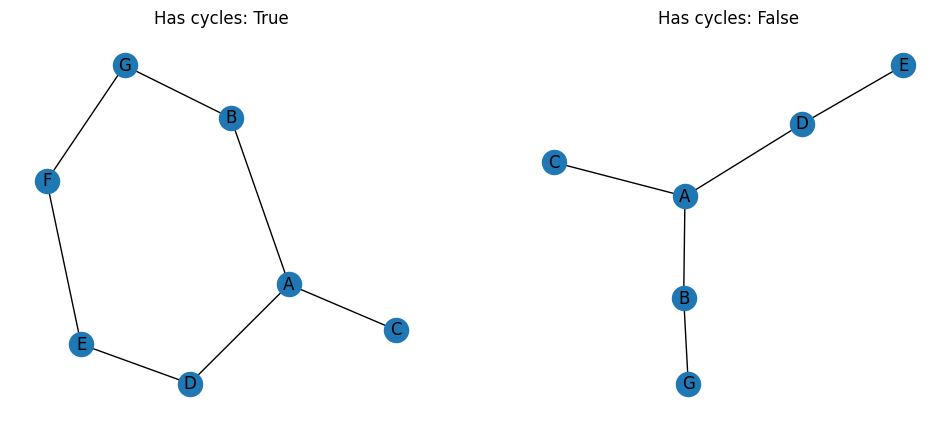

In [334]:
fig, axs = plt.subplots(1,2, figsize=(12,5))

lst = [('A','B'), ('A','C'), ('A','D'), ('D','E'), ('E','F'), ('F','G'), ('G','B')]
G = nx.Graph(lst)
has_cycles = detect_cycles(lst)
nx.draw(G, with_labels=True, ax=axs[0])
axs[0].set_title(f"Has cycles: {has_cycles}")

lst = [('A','B'), ('A','C'), ('A','D'), ('D','E'), ('G','B')]
G = nx.Graph(lst)
has_cycles = detect_cycles(lst)
nx.draw(G, with_labels=True, ax=axs[1])
axs[1].set_title(f"Has cycles: {has_cycles}")

plt.show()

<div class="alert alert-success">
    <h1>Problema 3: Kruskal</h1>
    <p>
       Implementeu l'algorisme Kruskal, basat en l'agorisme Union-Find. Podeu usar les funcions <b>union</b> i <b>find</b> ja implementades.
    </p>    
    
</div>

In [335]:
def key_ordering(elem):
    return elem[2]

def kruskal(lst):
    """
    Implementació de l'algorisme kruskal
    
    Params
    ======
    :lst: Una llista d'arestes amb pes del graf del que volem trobar-ne el MST. lst=[(n1,n2,w1),...]
    
    Returns
    =======
    :tree: Llista d'arestes del MST
    :tree_states: Versions de la variable tree que ens serviran per veure la construcció del MST.
    """
   
    tree = []
    tree_states = []  


    # Agafem tots els nodes únics
    list1, list2, paja = zip(*lst)
    unique_nodes = set(list1+list2)
    
    # Inicialitzem les dues variables rank i parent que ens serviran per anar construïnt el graf
    rank = defaultdict(int)
    parent = {n: n for n in unique_nodes}

    count = 0
    sorted_edges = sorted(lst, key=key_ordering)

    for edge in sorted_edges:

        if count < len(unique_nodes)-1:
            node1, node2 = edge[0], edge[1]
            root1, root2 = find(parent, node1), find(parent, node2)

            if root1 != root2:
                count += 1
                tree.append(edge)
                tree_states.append(tree[:])
                union(parent, rank, root1, root2)

        else: break
    
    
    return tree, tree_states

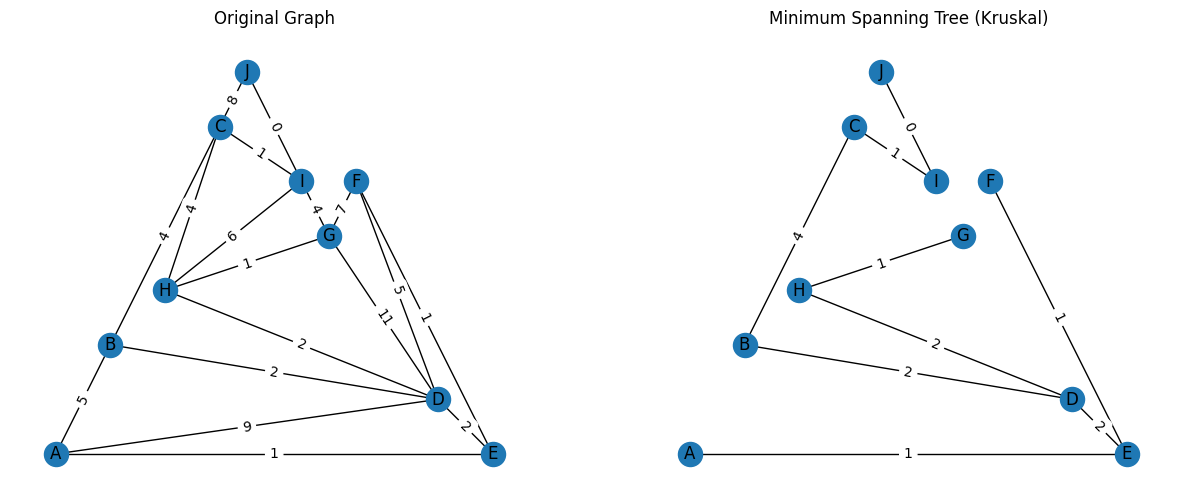

In [336]:
lst = [('A','B',5), ('A','D',9), ('A','E',1), ('B','C',4),('B','D',2),('C','J',8),('C','I',1),('C','H',4),('D','E',2),('D','F',5),('D','G',11),('D','H',2),('E','F',1),('F','G',7),('G','H',1),('G','I',4),
      ('H','I',6), ('I','J',0)]

fig, axs = plt.subplots(1,2, figsize=(15,6))

# Creem un graf i el mostrem a partir de la llista d'arestes i pesos anterior
G = nx.Graph()
G.add_weighted_edges_from(lst)
pos = nx.planar_layout(G)
nx.draw(G, pos=pos, with_labels=True, ax=axs[0])
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels, ax=axs[0])
axs[0].set_title('Original Graph')

# Executem l'algorisme sobre aquesta llista
struc, struc_states = kruskal(lst)

# Mostrem el MST
G = nx.Graph()
G.add_weighted_edges_from(struc)
nx.draw(G, pos=pos, with_labels=True, ax=axs[1])
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels, ax=axs[1])
axs[1].set_title('Minimum Spanning Tree (Kruskal)')

plt.show()

In [ ]:
fig, axs = plt.subplots(math.ceil(len(struc_states)/6), 6, figsize=(25,math.ceil(len(struc_states)/6)*4.5))
axs = axs.flatten()

lst = sorted(lst, key=lambda x: x[2])
for i, state in enumerate(struc_states):
    G_state = nx.Graph()
    G_state.add_nodes_from(G.nodes())
    G_state.add_weighted_edges_from(state)
    
    # Agafem la posició del grap final per a que tots els plots siguin iguals
    nx.draw_networkx(G_state, pos=pos, ax=axs[i], with_labels=True)
    labels = nx.get_edge_attributes(G_state,'weight')
    nx.draw_networkx_edge_labels(G_state,pos,edge_labels=labels, ax=axs[i])

    n1, n2, w = lst[i]
    axs[i].set_title(f'State {i}: ({n1}, {n2}, {w})')

for i in range(len(struc_states), len(axs)): 
    axs[i].axis('off')
plt.tight_layout()
plt.show()